# Quick Transfer Learning with fast.ai

## Classify Angry vs Happy Dogs

In [12]:
from fastai import *
from fastai.vision import *

import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
from PIL import Image
%matplotlib inline

### Path to images

In [13]:
path = Path('/home/jupyter/myDir/fastai/dog/') # contains subdirectories: "happy" and "angry", with their corresponding images.

### Show some examples

In [14]:
def showExamples(ids):
    fig=plt.figure(figsize=(15, 15))
    for i,j in enumerate(ids):
        image = Image.open(pathToClass/(images[j]))
        fig.add_subplot(1,len(ids),i+1)
        plt.imshow(np.asarray(image))
        plt.axis("off")
    plt.show()

#### Angry dogs

A total of 178 images with angry dogs.


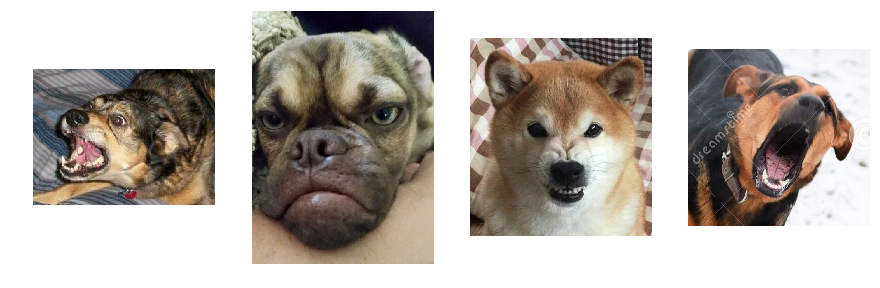

In [15]:
pathToClass = path/'angry'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with angry dogs.")
showExamples([55,105,150,170])

#### Happy dogs

A total of 302 images with happy dogs.


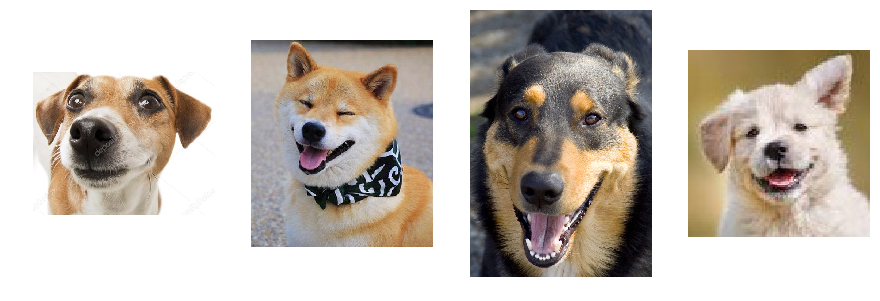

In [16]:
pathToClass = path/'happy'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with happy dogs.")
showExamples([30,120,135,230])

## Read data

- Leave 30% for validation.

- Apply default data augmentation transformations.

In [17]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.3,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [18]:
data.classes

['angry', 'happy']

#### Show some images used for training

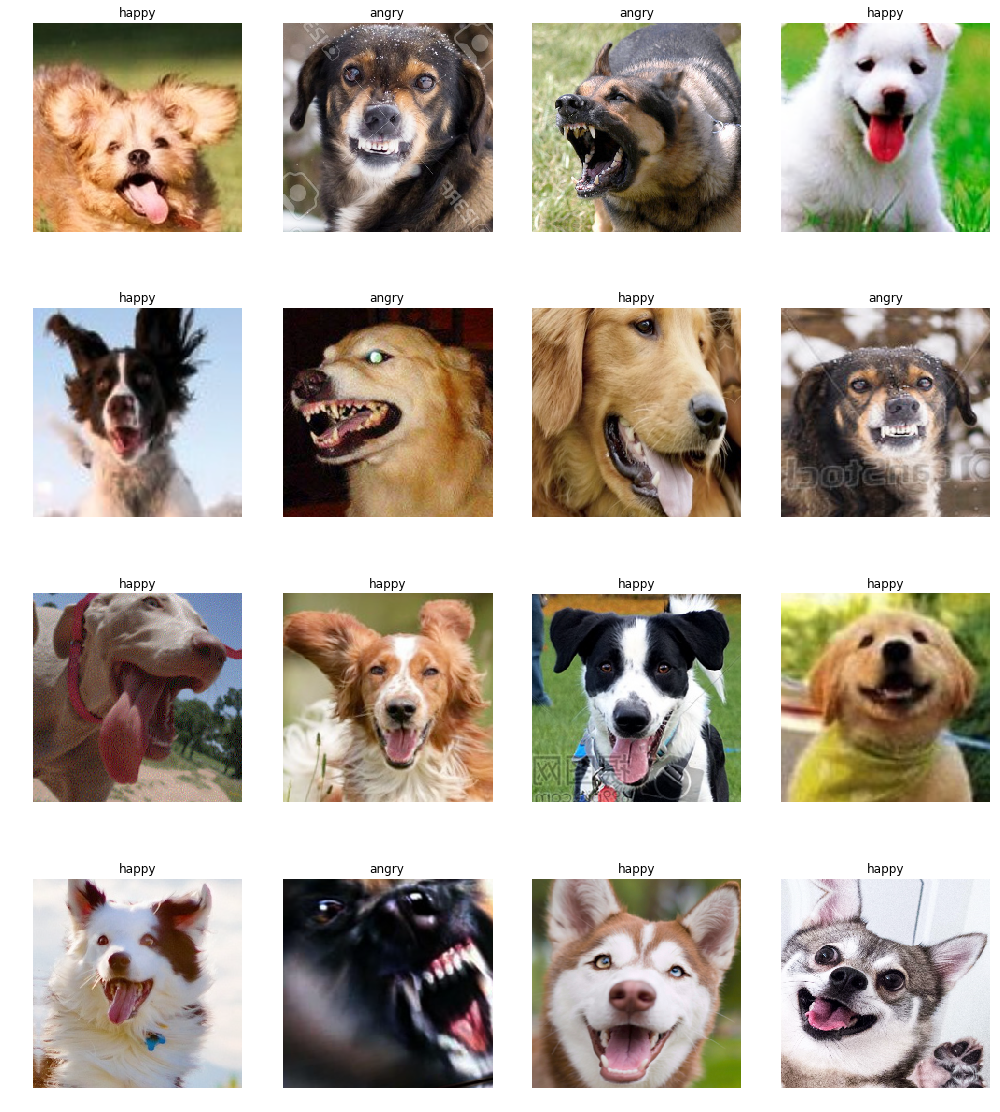

In [19]:
data.show_batch(rows=4, figsize=(14,16)) 

In [20]:
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in validation:", len(data.valid_ds))

Number of examples in training: 336
Number of examples in validation: 144


## Train model

#### Apply transfer learning using resnet34, tuning the parameters of the last layer.

In [21]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

#### Learn through 10 epochs; error rate is on validation set

In [22]:
learn.fit_one_cycle(10)

Total time: 00:45
epoch  train_loss  valid_loss  error_rate
1      0.792029    0.555003    0.277778    (00:04)
2      0.637223    0.369267    0.173611    (00:04)
3      0.525014    0.277913    0.125000    (00:04)
4      0.432581    0.257073    0.083333    (00:04)
5      0.360416    0.244819    0.083333    (00:04)
6      0.313949    0.228809    0.083333    (00:04)
7      0.290195    0.245241    0.097222    (00:04)
8      0.252836    0.241439    0.076389    (00:04)
9      0.227076    0.250536    0.083333    (00:04)
10     0.203434    0.253151    0.076389    (00:04)



### Error rate on validation: 7.6% (accuracy 92.4%) 

In [23]:
learn.save('dogs-1')

In [24]:
#learn.load('dogs-1')

## Confusion matrix on the validation set

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

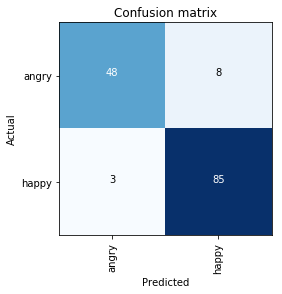

In [26]:
interp.plot_confusion_matrix()

In [27]:
cm = interp.confusion_matrix()
precision = cm[0,0]/sum(cm[:,0])
recall = cm[0,0]/sum(cm[0,:])
f1score = 2*precision*recall/(precision+recall)
print("F1-score", f1score)

F1-score 0.897196261682243


## Cases with highest loss

As shown in the confusion matrix, there are 11 misclassifications. These 11 cases are shown next, along with the prediction made, the actual class, the loss value, and the probability estimated for the correct class. 

Then, 5 more cases with high loss are shown, although they correctly classified.

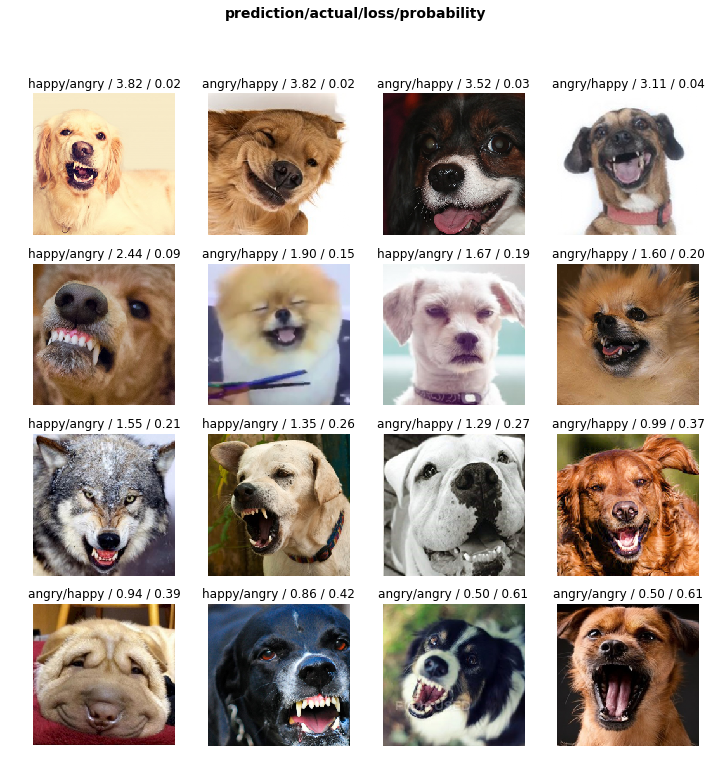

In [55]:
interp.plot_top_losses(16)